<div style="
    border: 2px solid #4CAF50; 
    padding: 15px; 
    background-color: #f4f4f4; 
    border-radius: 10px; 
    align-items: center;">

<h1 style="margin: 0; color: #4CAF50;">Neural Networks: Feed Forward Neural Networks (MLP)</h1>
<h2 style="margin: 5px 0; color: #555;">DSAI</h2>
<h3 style="margin: 5px 0; color: #555;">Jakob Eggl</h3>

<div style="flex-shrink: 0;">
    <img src="https://www.htl-grieskirchen.at/wp/wp-content/uploads/2022/11/logo_bildschirm-1024x503.png" alt="Logo" style="width: 250px; height: auto;"/>
</div>
<p1> © 2025/26 Jakob Eggl. Nutzung oder Verbreitung nur mit ausdrücklicher Genehmigung des Autors.</p1>
</div>
<div style="flex: 1;">
</div>   

## Wiederholung Lineare Regression

Wir haben am Ende vom letzten Notebook selber eine lineare Regression programmiert. Wir wiederholen kurz die wichtigsten Punkte:

Im eindimensionalen Fall haben wir als Input unsere $Z$ Datenpaare $\{(x_i,y_i)\}_{i=1}^{Z}$, wobei jedes $x_i\in\mathbb R$ das (einzige) Input Feature ist und $y_i\in\mathbb R$ der dazugehörige Output (Label). Ziel ist es $k,d\in\mathbb R$ zu finden, sodass ein vorgegebener Fehler (zum Beispiel Mean Squared Error) für unser gefundenes Modell
$$\hat f(x) = k\cdot x + d$$
klein ist.

Im mehrdimensionalen ist die Idee gleich, wir sprechen auch hier noch von einer **Linearen Regression**. Das Modell ist in diesem Fall dann
$$\hat f(X) = WX+b$$
und wir suchen diesmal eine Matrix $W$ (in diesem Fall ein Vektor, weil der Output eine Zahl ist) und einen Vektor $b$ (auch hier kein Vektor sondern eine Zahl, weil Output ein Vektor ist). Hier entspricht $W$ quasi unserem $k$ von vorher und $b$ unserem $d$.

**Hinweis:** In diesem Fall sind unsere Daten eine Matrix (quasi wie das Dataframe, bestehend aus $Z$ Zeilen und $d$ Spalten). Jede Zeile repräsentiert ein $x_i$ und ist dann ein Vektor bestehend aus den $d$ (Dimension) reellen Zahlen (**=Features**) $x_{i1}, x_{i2}, \ldots, x_{id}$.

**WICHTIG:** Lineare Regression ist offensichtlich ein *Supervised Machine Learning* Problem. Wir werden uns im folgenden (für Neuronale Netzwerke) hauptsächlich mit Supervised Machine Learning beschäftigen. Sprich wir haben immer das Label $y$ gegeben. Dies kann eine (oder mehrere) Klasse(n) sein, oder auch in der Form von Zahlenwerten gegeben sein.

## Das Perzeptron

Die mehrdimensionale, lineare Regression ist auch die Grundidee des sogenannten **Perzeptrons**, erfunden von *Frank Rosenblatt* im Jahr 1957.

Das folgende Bild zeigt den (leicht modifizierten) Aufbau eines einzigen Perzeptrons. Wir sehen, der Output $z$ ist nichts anderes als wie bei uns $\hat f (x)$ bzw. $\hat f (X)$.

![Perzeptron_Zugeschnitten](../resources/Perzeptron_zugeschnitten.png)

(von https://www.mql5.com/de/articles/8908)

Es gilt also:

\begin{align*}
    z &= w_1 \cdot x_1 + w_2 \cdot x_2 + \ldots + w_N \cdot x_N + b\\
    &= \underbrace{\begin{pmatrix}
        w_1 & w_2 & \ldots  & w_N
    \end{pmatrix}}_{=W}\cdot 
    \underbrace{\begin{pmatrix}
        x_1 \\ x_2 \\ \vdots \\ x_N
    \end{pmatrix}}_{=X}  + b
\end{align*}

**Wichtig:** Wie bereits vorher erwähnt, wird im obigen Bild und jetzt generell immer nur ein Datenpunkt betrachtet, also zum Beispiel beim Iris Dataset eine bestimmte Blume mit den Eigenschaften $x_1, x_2, x_3, x_4$ (die 4 Längen). Ansonsten bräuchten wir eine Doppel-Indizierung ($x_{ij}$). 

Den Bias können wir auch in der Weight-Matrix $W$ verstecken:

$$z = w_1 \cdot x_1 + w_2 \cdot x_2 + \ldots + w_N \cdot x_N + b = \begin{pmatrix}
        w_1 & w_2 & \ldots  & w_N
    \end{pmatrix}\cdot 
    \begin{pmatrix}
        x_1 \\ x_2 \\ \vdots \\ x_N
    \end{pmatrix} + b = \begin{pmatrix}
        w_1 & w_2 & \ldots & w_N & b
    \end{pmatrix}\cdot 
    \begin{pmatrix}
        x_1 \\ x_2 \\ \vdots \\ x_N \\ 1
    \end{pmatrix}.$$

### Notation:

* Wir nennen ab jetzt die Parametermatrix $W$ **Weights**
* Die Matrix $X$ ist unser **Input**
* $b$ ist der **Bias**

## Vom Perzeptron zum Linearen Layer

*Aber wie hängt das jetzt mit Künstlicher Intelligenz bzw. mit Neuronalen Netzwerken zusammen?*

Wir werden jetzt unser Perzeptron immer weiter verallgemeinern und schlussendlich beim **Multi-Layer Perzeptron** (*MLP*) landen. Dieses ist bei einem normalen Feed-Forward Neural Network der Standard und bildet quasi schon ein vollständiges *neuronales Netzwerk*!

Der erste Schritt dazu ist, dass wir nun mehrerere Perzeptrons nebeneinander verwenden können, falls wir mehrere Werte am Ausgang haben wollen.

Was wäre ein möglicher Anwendungsfall? (Wir werden später sehen, warum das Sinn macht)

In so einem Fall sieht dann unser Aufbau folgendermaßen aus.

![Single_Layer_Perceptron](../resources/single_layer_perceptron.jpg)

(von https://www.upgrad.com/blog/perceptron-learning-algorithm-how-it-works/)

Sprich wir haben hier einfach 3 (rote) Perzeptrons nebeneinander, welche jeweils 5 Input-Features (blau) verarbeiten. Dabei hat jedes Perzeptron seine eigenen Gewichte und Bias. Die Outputs in rot lassen sich dann so berechnen:

\begin{align*}
    z_1 &= W_1X+b_1 \\
    z_2 &= W_2X+b_2 \\
    z_3 &= W_3X+b_3
\end{align*}

Dies können wir aber auch in Vektorschreibweise schreiben mit $\mathbf z = (z_1, z_2, z_3)$ und $\mathbf W = (W_1, W_2, W_3)$ und $\mathbf b = (b_1, b_2, b_3)$. Wir erhalten dann

$$\mathbf z = \mathbf W \mathbf x + \mathbf b.$$

Hier ist nochmal dargestellt, wie das ganze in Matrix schreibweise aussieht für ein ähnliches Problem.

![MLP_Matrix_Multiplication](../resources/mlp_matrix_mul.png)

(von https://community.deeplearning.ai/t/matrix-multiplication-in-neural-network/685083)

**Hinweis:** Auch hier könnten wir den Bias wieder verstecken in der Weight-Matrix, ist aber erneut wieder nur eine rein optische Änderung.

Wir sehen im obigen Bild auch, dass die Perzeptrons hier **Neuronen** genannt werden. Um zu verstehen, warum das Sinn macht, sehen wir uns folgende Grafik an.

![Biological_vs_Artificial_Neuron](../resources/Biological_Neuron_vs_Artificial_Neuron.png)

(von https://towardsdatascience.com/the-concept-of-artificial-neurons-perceptrons-in-neural-networks-fab22249cbfc/)

Unser *Perzeptron* ist also ein Konstrukt, dass dem biologischen Neuron ähneln soll.

Wir sehen, dass rechts auch noch eine sogenannte **Activation Function** $f$ ist. Diese ignorieren wir noch zwischenzeitlich und kümmern uns vorher noch um den nächsten Punkt.

## Vom Linearen Layer zum MLP

Um nun ein neuronales Netz zu erhalten, schalten wir mehrere Schichten von den vorigen Perzeptronen hintereinander. Eine Schicht wird dabei **Single-Layer Perzeptron** genannt. Mehrere Schichten nennen wir dann **Multi-Layer Perzeptron**.

![MLP](../resources/mlp.png)

(von https://machinelearninggeek.com/multi-layer-perceptron-neural-network-using-python/)

Obiges Beispiel zeigt also ein Multi-Layer Perceptron (also eine mögliche Form eines neuronalen Netzes) mit $3$ **Inputs** (das Dataset hat also 3 Features) und einem **Output** Neuron (Rot). Dazwischen (grün) sind die sogenannten **Hidden Layers**.

Die Anzahl der Hidden Layers beschreibt die **Tiefe des Neuronalen Netzwerkes**. Von hier kommt auch der Begriff **Deep Learning**, welcher im Vergleich zu **Machine Learning** für (sehr) tiefe neuronale Netze verwendet wird.

**Hinweis:** Alle modernen großen KI-Modelle sind "Deep-Learning"-Modelle.

Beim Aufbau so eines Netzwerkes haben wir relativ viele Freiheitsgrade (Hyperparameter), da wir die Anzahl der Hidden Layers und die dazugehörigen Anzahl an Neuronen pro Hidden Layer frei wählen können. Fix vorgegeben sind nur die Anzahl der Input Neuronen (=Anzahl der Features im Dataset) und je nach Task (Regression/Klassifikation) ist die Anzahl der Output-Neuronen festgelegt.

Wir sehen in der Grafik auch, dass der Output von den Neuronen in Schicht $n$ der Input für die Neuronen aus Schicht $n+1$ darstellt. Somit ist also jedes Neuron aus Schicht $n$ verbunden mit alle Neuronen aus Schicht $n+1$.

Wie können wir den Output nun berechnen anhand von diesem schematischen Beispiel?

Wir bezeichnen die einzelnen Elemente nun folgendermaßen:
* Input-Layer: $\mathbf X = (x_1, x_2, x_3)$
* Hidden-Layer 1: $\mathbf h_1 = (h_{11}, h_{12}, h_{13}, h_{14})$
* Hidden-Layer 2: $\mathbf h_2 = (h_{21}, h_{22}, h_{23}, h_{24})$
* Hidden-Layer 3: $\mathbf h_3 = (h_{31}, h_{32}, h_{33}, h_{34})$
* Output: $\mathbf z$


Es gilt
\begin{align*}
    \mathbf h_{1} &= \mathbf W_{1}\mathbf X \\
    \mathbf h_{2} &= \mathbf W_{2}\mathbf h_1 \\
    \mathbf h_{3} &= \mathbf W_{3}\mathbf h_2 \\
    \mathbf z &= \mathbf W_4 \mathbf h_3
\end{align*}

> **Übung:** Welche Dimensionen haben hier die Elemente?

> **Übung:** Wie viele Parameter hat das Netzwerk, welche wir später lernen wollen?

## Lineare Layer in PyTorch

Um nun diese Funktionalität in PyTorch zu erreichen, könnte man meinen, man initialisiert einfach die verschiedenen Weight-Matrizen und die Bias-Vektoren als Tensoren mit Gradient und berechnet die Output "händisch". Das ist prinzipiell nicht falsch, aber tatsächlich ist es viel einfacher, wie wir im folgenden sehen.

**Hinweis:** Der Grund warum wir Gradienten brauchen, wird spätestens klar, wenn wir über die Optimierung (=das Lernen von Neuronale Netzwerke) lernen.

In [1]:
import torch
import torch.nn as nn

Um nun ein Neuronales Netzwerk zu designed, müssen wir zuerst eine **Klasse erstellen**, welche von `nn.Module` erbt. Danach müssen wir nur noch die `init` und `forward` **Methoden implementieren** und unser Netzwerk ist schon fertig.

Wir bauen jetzt das Netzwerk von gerade eben nach (3 Input Features, 3 Hidden Layers mit jeweils 4 Features, Output Layer mit einem Neuron).

In [2]:
class MyFirstNeuralNetwork(nn.Module):
    """A simple feedforward neural network, that expects 3 input features and produces 1 Output by using 3 Hidden Layers with 4 Features each."""
    def __init__(self):
        super().__init__()
        self.hidden_layer_1 = nn.Linear(3, 4) # transforms the 3 features into 4 features
        self.hidden_layer_2 = nn.Linear(4, 4) # transforms the 4 features into 4 features
        self.hidden_layer_3 = nn.Linear(4, 4) # transforms the 4 features into 4 features
        self.output_layer = nn.Linear(4, 1) # transforms the 4 features into 1 feature

    def forward(self, x):
        """
        :param x: Input tensor with shape (batch_size, 3)
        :return: Output tensor with shape (batch_size, 1)
        """
        x = self.hidden_layer_1(x)
        x = self.hidden_layer_2(x)
        x = self.hidden_layer_3(x)
        x = self.output_layer(x)
        return x

Damit ist unser Neuronales Netzwerk schon fertig. Natürlich ist das soeben erstellte Neuronale Netzwerk sehr einfach. Man könnte es noch weiter vergrößern. Es ist auch möglich, in der Forward Methode zu Normalisieren, bzw. die Daten zu bearbeiten. Wir können unser Netzwerk auch variabel machen, indem wir im Konstruktor (`init`) noch Parameter übergeben.

> **Übung:** Warum speichern wir hier 2x das gleiche Lineare Layer (`nn.Linear(4,4)`) als 2 verschiedene Variablen (`self.hidden_layer_2` und `self.hidden_layer_3`)?

Ändern wir unser Netzwerk nun so, dass wir keinen Bias haben und die Anzahl der Input Features angepasst werden kann.

In [3]:
class MyVariableFirstNeuralNetwork(nn.Module):
    """A simple feedforward neural network, that expects n_input_features input features and produces 1 Output by using 3 Hidden Layers with 4 Features each."""
    def __init__(self, n_input_features: int):
        super().__init__()
        self.hidden_layer_1 = nn.Linear(n_input_features, 4, bias=False) # transforms the n_input_features features into 4 features
        self.hidden_layer_2 = nn.Linear(4, 4, bias=False) # transforms the 4 features into 4 features
        self.hidden_layer_3 = nn.Linear(4, 4, bias=False) # transforms the 4 features into 4 features
        self.output_layer = nn.Linear(4, 1, bias=False) # transforms the 4 features into 1 feature

    def forward(self, x):
        """
        :param x: Input tensor with shape (batch_size, n_input_features)
        :return: Output tensor with shape (batch_size, 1)
        """
        x = self.hidden_layer_1(x)
        x = self.hidden_layer_2(x)
        x = self.hidden_layer_3(x)
        x = self.output_layer(x)
        return x

Unser Netzwerk können wir nun folgendermaßen erstellen (die Gewichte werden am Anfang zufällig gewählt).

In [4]:
model = MyVariableFirstNeuralNetwork(n_input_features=3)

Um nun den Output zu berechnen, können wir das Model wie eine Funktion aufrufen. Dabei wird dann die `forward` Methode ausgeführt.

In [5]:
aux_input = torch.tensor([[1.0, 2.0, 3.0]])
output = model(aux_input)

In [6]:
output

tensor([[0.1016]], grad_fn=<MmBackward0>)

Wie oben in der `forward` Methode als Kommentar geschrieben, ist die *Shape*, die sich das Modell bei der `forward` Methode erwartet, `(batch_size, n_input_features)`. Dabei steht die `batch_size` für die Anzahl der Datenpunkte gleichzeitig. Sprich, wenn wir nun als Input 2 Vektoren der Länge 3 haben, dann werden beide Elemente durch das Netzwerk geschickt.

In [7]:
aux_input = torch.tensor([[1.0, 2.0, 3.0], [-1.0, 4, 0.1111]])
output = model(aux_input)

In [8]:
output

tensor([[ 0.1016],
        [-0.2725]], grad_fn=<MmBackward0>)

Wir sehen, der Output besteht nun auch aus 2 Einträgen (jeweils das eine Output Neuron für beide Datenpunkte).

Wir können also stand jetzt--unser Modell ist sehr klein--in vielen Fällen auch das ganze Dataset durch das Modell schicken. Später, zum Beispiel bei Bildern, wird uns das nicht mehr möglich sein, da werden wir dann sogenannte Teile des Datasets verwenden (Batches). Dies werden wir uns genauer anschauen, wenn wir über Datasets und Dataloader lernen. 

**Hinweis:** Für die Inferenz (= spätere Verwendung vom Modell) ist uns die Möglichkeit, mehrere Datenpunkte gleichzeitig verwenden zu können relativ "egal", da wir meistens immer nur an einer Vorhersage interessiert sind. Für das Training jedoch ist es sehr praktisch, da wir dann die Parameter für mehrere Samples gleichzeitig bearbeiten können.

Betrachten wir nun nochmal die Formel von vorher und schreiben alles in eine Zeile. Was fällt uns auf?

$$\mathbf z = \mathbf W_4 \mathbf W_3 \mathbf W_2 \mathbf W_1 \mathbf X$$

Hat es wirklich einen Vorteil, wenn wir mehrere lineare Layer einfach hintereinander schalten?

Natürlich **NICHT**, genauso wie im 1d Fall $\hat f(x) = kx+d$ wär die Hintereinanderausführung umsonst, da wieder eine lineare Funktion entsteht. Also unsere Netzwerk (also unsere Funktion) ist nach wie vor einfach eine lineare (im mehrdimenionalen eine Ebene). Dies reicht nicht aus, um komplizierte Zusammenhänge zu lernen. Deswegen werden wir nun die sogenannten **Activation Functions** (*Aktivierungsfunktionen*) dazwischen schalten. Sie sind **nicht-linear** und erlauben so dem Modell, kompliziertere Zusammenhänge zu lernen.

> **Übung:** Zeige, dass für zwei lineare Funktionen, sagen wir $f(x)=a\cdot x + b$ und $g(x) = c\cdot x + d$ die Hintereinanderausführung $h(x):=f(g(x))$ auch wieder von der Form $h(x)=u\cdot x + v$ ist. Welchen Wert haben $u$ und $v$?

## Die Aktivierungsfunktion

Nachdem wir nun gesehen haben, dass wir zwischen den einzelnen Layern eine Aktivierungsfunktion brauchen, sehen wir uns nochmal den vollständigen Aufbau eines Perzeptrons an.

![Perzeptron](../resources/Perzeptron.png)

(von https://www.mql5.com/de/articles/8908)

Es ist also $z$ nur ein sogenanntes **Logit** und $y=\sigma(z)$ der "echte" Output.

**Wichtig:** In diesem Bild ist für die Aktivierungsfunktion eine *Sigmoidfunktion* $\sigma(x)$ eingezeichnet, prinzipiell kann es aber jede beliebige Aktivierungsfunktion sein $f$. (Dies ist bei dem Bild mit dem biologischen Neuron besser eingezeichnet). 

**Wichtig:** Für ein MLP ist *pro Schicht* immer die selbe Aktivierungsfunktion vorgesehen. Also nach jedem Layer können wir auswählen, welche Aktivierungsfunktion verwendet werden soll für diesen Layer.

### Anforderungen an eine Aktivierungsfunktion

Prinzipiell können wir jede Funktion als Aktivierungsfunktion verwenden, jedoch wollen wir ein paar (nicht zwingend erschöpfend) Eigenschaften sammeln:

* Nicht-Linearität: Ansonsten würde sich unsere Ausgangssituation nicht ändern
* Differenzierbarkeit: Für jeden Wert $x\in\mathbb R$ muss die Ableitung bekannt (berechenbar) sein
* Beschränkt oder "nicht-explodierend": Der Output muss in einem gewissen Bereich liegen oder nicht explodieren


Ein paar weitere nette Eigenschaften:
* Der Gradient von der Ableitung sollte idealerweise überall im Bereich $1$ sein
* Die Ableitung sollte ohne viel Rechenaufwand berechenbar sein

## Übersicht der gängigsten Aktivierungsfunktionen

Wir werden uns nun die gängigsten Aktivierungsfunktionen, deren Ableitungen, die Eigenschaften und die Vor- und Nachteile ansehen. Im Anschluss werden wir diese dann auch plotten. 

Dazu bereiten wir uns kurz eine Plotting Methode vor.

In [9]:
import numpy as np
import matplotlib.pyplot as plt

In [10]:
def plot_function_and_derivative(func, deriv, f_name, x_range):
    x = np.linspace(x_range[0], x_range[1], 1000)
    y = func(x)
    dy = deriv(x)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

    ax1.plot(x, y, label=f"{f_name}(x)")
    ax1.set_title(f"{f_name}(x)")
    ax1.set_xlabel("x")
    ax1.set_ylabel("y")
    ax1.grid()
    ax1.legend()

    ax2.plot(x, dy, label=f"{f_name}'(x)", color="orange")
    ax2.set_title(f"{f_name}'(x)")
    ax2.set_xlabel("x")
    ax2.grid()
    ax2.legend()

    plt.show()

### Sigmoid Funktion

\begin{align*}
    f(x) &= (1+e^{-x})^{-1}\\
    f'(x) &= \sigma(x) \cdot (1-\sigma(x))
\end{align*}

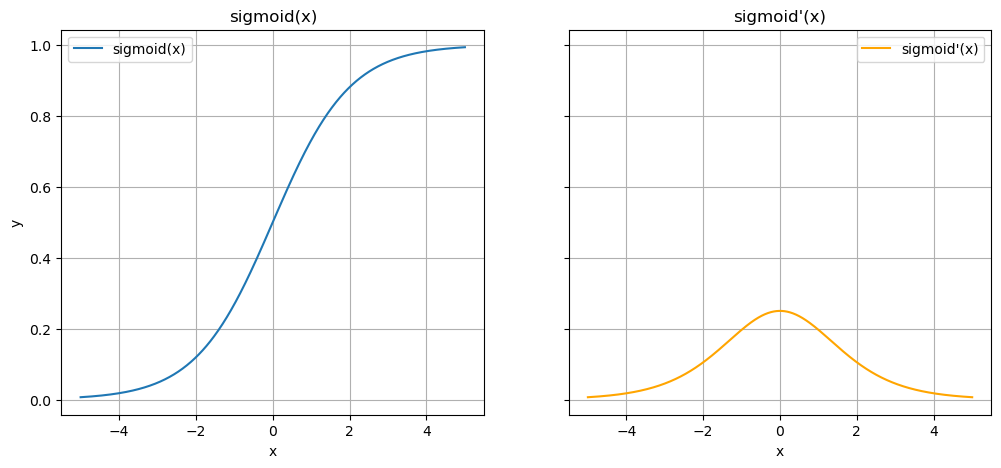

In [11]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    x = sigmoid(x)
    return x * (1 - x)

plot_function_and_derivative(sigmoid, sigmoid_derivative, "sigmoid", (-5, 5))

**Eigenschaften:**

* Mappt auf den Bereich $(0,1)$
* Sieht wie ein $S$ aus, darum der Name *Sigmoid*

**Vorteile:**
* Gut geeignet für binäre Klassifikationsprobleme (wenn wir nur ein Output Neuron verwenden wollen, siehe Logistic Regression).
* Einfache Ableitung (welche aus dem Funktionswert berechnet werden kann)

*Hinweis:* Wir werden später sehen, dass bei Klassifikation es mehr Sinn macht, wenn wir statt nur einem Output Neuron für jede Klasse ein eigenen Neuron verwenden.

**Nachteile:**:
* Ableitung ist klein, genauer gesagt liegt sie im Bereich $(0,0.25]$
* Nicht verwendbar bei mehr als 2 Klassen, weil es auf jedes Neuron individuell angewendet wird (siehe Softmax)
* Für Werte, weit weg von der $0$ ist die Sigmoid Funktion sehr flach und somit die Ableitung quasi $0$ (Normalisieren!)

> **Übung:** Zeigen Sie, dass für die Ableitung der Sigmoid Funktion $\sigma(x)=(1+e^{-x})^{-1}$, $\sigma'(x)=\sigma(x)\cdot (1-\sigma(x))$ gilt.

### tanh

\begin{align*}
    f(x) &= \tanh(x) = \frac{\sinh(x)}{\cosh(x)}\\
    f'(x) &= 1-\tanh^2(x)
\end{align*}

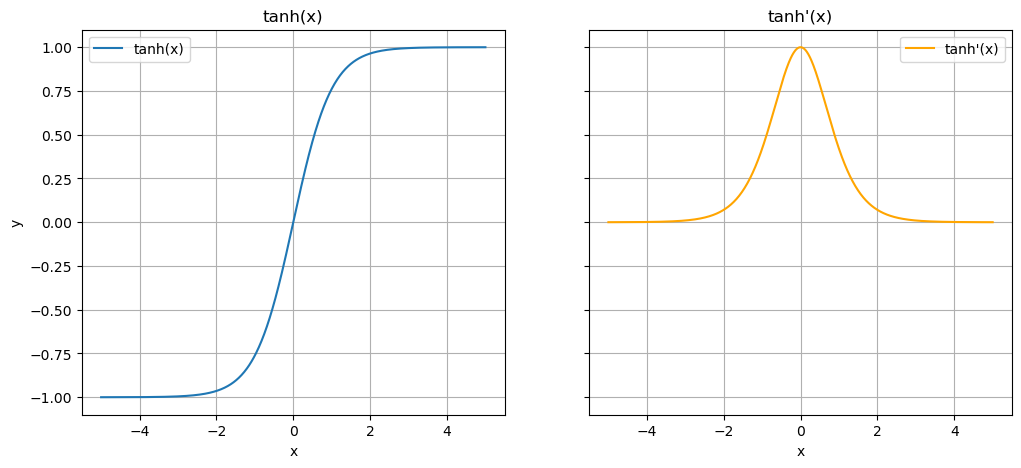

In [12]:
def tanh(x):
    return np.tanh(x) 

def tanh_derivative(x):
    return 1-tanh(x)**2

plot_function_and_derivative(tanh, tanh_derivative, "tanh", (-5, 5))

**Eigenschaften:**

* Mappt auf den Bereich $(-1,1)$
* Ist eine skalierte Version der Sigmoid Funktion $\sigma(x)$. Es gilt $\tanh(x)=2\sigma(2x)-1$

**Vorteile:**

* Einfache Ableitung (welche aus dem Funktionswert berechnet werden kann)
* Ableitung ist nicht mehr beschränkt durch $0.25$ sondern liegt jetzt im Bereich $(0,1]$

**Nachteile:**

* Nach wie vor die meisten Werte der Ableitung kleiner 1, somit zu klein
* Auch hier ist die Ableitung relativ schnell $0$ für Werte, die nicht im Bereich von $0$ liegen (Normalisieren!)

> **Übung:** Zeigen Sie, dass für die Ableitung der *tanh* Funktion $f(x)=\tanh(x)$,  $f'(x)=1-\tanh^2(x)$ gilt.

### ReLU

\begin{align*}
    f(x) &= \max(0, x) = \begin{cases}x & x>0, \\ 0 & \text{sonst}.\end{cases}\\
    f'(x) &= \begin{cases} 1 & x > 0, \\ 0 & \text{sonst}. \end{cases}
\end{align*}

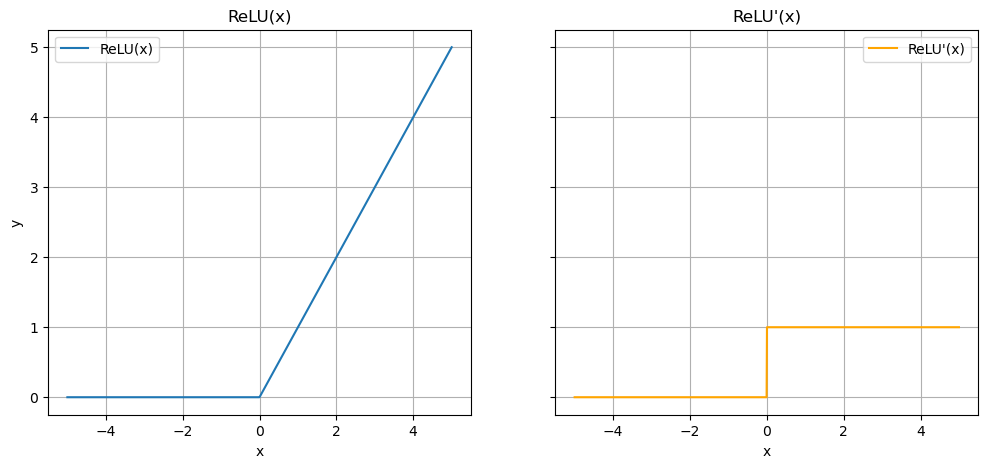

In [13]:
def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return np.where(x > 0, 1, 0)

plot_function_and_derivative(relu, relu_derivative, "ReLU", (-5, 5))

**Eigenschaften:**

* **Re**ctified **L**inear **U**nit
* Gibt es noch in weiteren Versionen

**Vorteile:**

* Einfache Ableitung (nur eine If-Abfrage)
* Ableitung für die Hälfte der Werte $1$

**Nachteile:**

* "Dying ReLU Problem": Neuronen können inaktiv werden, weil sie aufgrund der ReLU Funktion einerseits keinen Output liefern können und auch die Ableitung ist $0$ in diesem Punkt, somit kann sich deren Zustand auch nicht mehr ändern

**Weitere ReLU Versionen:**

#### Leaky ReLU:

\begin{equation*}
    f(x) = \begin{cases} x & x>0, \\ \alpha x & x\leq 0 \end{cases}
\end{equation*}

mit $\alpha\in\mathbb R$ meistens im Bereich $\alpha = 0.01$.

#### Exponential Linear Unit (ELU):

\begin{equation*}
    f(x) = \begin{cases} x & x>0, \\ \alpha (e^x-1) & x\leq 0 \end{cases}
\end{equation*}

mit $\alpha>0$.

> **Übung:** Berechnen Sie die Ableitungen der einzelnen Funktionen und zeichnen Sie die Funktionen! 

### Swish

\begin{align*}
    f(x) &= x \cdot \sigma(x)\\
    f'(x) &= \sigma(x) + x\cdot \sigma'(x) = \sigma(x) + x\cdot \sigma(x)\cdot (1-\sigma(x))
\end{align*}

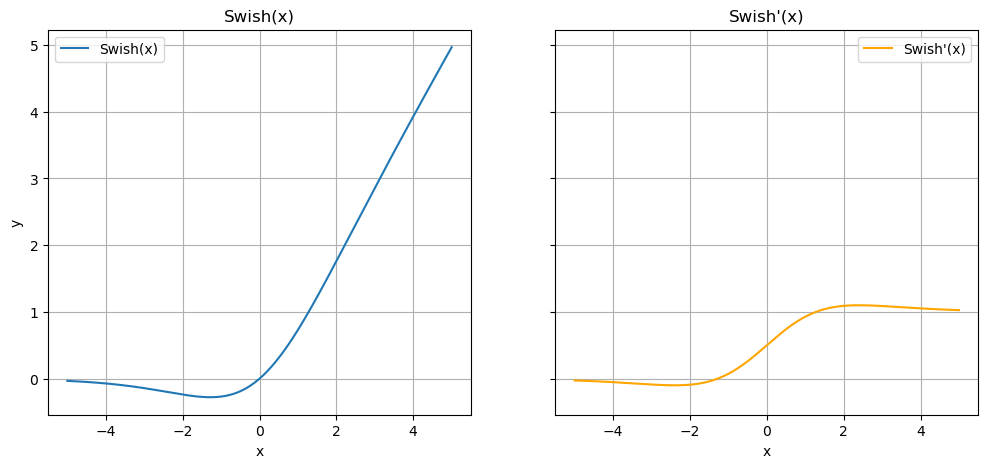

In [14]:
def swish(x):
    return x * sigmoid(x)

def swish_derivative(x):
    s = sigmoid(x)
    return s + x * s * (1 - s)

plot_function_and_derivative(swish, swish_derivative, "Swish", (-5, 5))

**Eigenschaften:**

* Nicht monoton
* Wird auch SiLU (**Si**gmoid **L**inear **U**nit) genannt.
* Mehr oder weniger Kombination von ReLU und Sigmoid

**Vorteile:**

* Ableitungswerte in einem guten Bereich (nicht zu klein)
* In manchen Machine-Learning Tasks besser als ReLU. 

**Nachteile:**

* Aufwendiger zum Berechnen
* Nicht-Monotonität macht es schwerer zu Optimieren.

> **Übung:** Zeigen Sie, dass $\sigma(x) + x\cdot \sigma(x)\cdot (1-\sigma(x))$ tatsächlich die Ableitung von $\sigma(x)\cdot x$ ist.

---

Wir kommen nun zu einer speziellen *Aktivierungsfunktion*, der sogenannten Softmax-Funktion. Sie wird auf ein ganzes Layer angewendet (es werden also auch die Werte des ganzen Layers zur Berechnung herangezogen). Außerdem wird diese Funktion normalerweise nur im letzten Layer (beim Output) verwendet. Grund dafür ist, dass wir mit dieser Funktion die Outputs der einzelnen Neuronen in eine Wahrscheinlichkeitsverteilung umwandeln können. Sprich wir bekommen dann am Ende einen Vektor, der in Summe $1.0$ (=100%) ergibt. Diese Einträge spiegeln dann die Vorhersage des Models wieder. Ist der Output also $[0.1, 0.1, 0.8, 0]$, dann glaubt das Modell, dass wir zu 80% in Klasse 3 sind und zu je 10% in Klasse 1 oder 2.

## Softmax

\begin{equation*}
    \text{softmax}(x)_i = \frac{e^{z_i}}{\sum_{j=1}^{n}e^{z_j}}.\\
\end{equation*}

**Eigenschaften:**

* Erzeugt eine Verteilung mit Summe $1.0$
* Gewichtet die Einträge exponentiell, also kleine Unterschiede können sich groß auswirken
* Alle Einträge sind im Anschluss positiv

**Hinweis:** Prinzipiell wäre es für die reine Klassifizierung ausreichend, die Logits zu verwenden. Sprich wir verwenden einfach den Eintrag mit dem maximalen Wert. Die exponentielle Gewichtung zu einer Wahrscheinlichkeitsverteilung ist aber zur Loss-Berechnung vorteilhaft bzw. notwendig.

**Wichtig:** Wir verwenden also im Fall einer Klassifikation in Zukunft nicht mehr die Sigmoid Funktion und erhalten dann eine Wahrschenlichkeit für Klasse 1, sondern wir verwenden einfach so viele Output-Neuronen, wie es Klassen gibt. Im Anschluss verwenden wir die Softmax Funktion und erhalten die Wahrscheinlichkeiten.

Die folgenden beiden Beispiele zeigen das exemplarische Verhalten der Softmax Funktion.

![Softmax_Example_1](../resources/softmax_example1.png)

(von https://mriquestions.com/softmax.html)

![Softmax_Example_2](../resources/softmax_example2.png)

(von https://ogunlao.github.io/2020/04/26/you_dont_really_know_softmax.html)

Haben wir nun ein Dataset mit den Labels *Katze, Hund, Pferd* (egal ob jetzt Bilder davon oder ob wir einfach ein paar Eigenschaften in Tabellen gesammelt haben wie zbsp Gewicht, Farbe, etc.), so müssen wir jetzt einen **OneHot-Encoder** verwenden.

Im obigen Beispiel wären dann die Labels (in diesem Fall dann eine Verteilung (ein Vektor mit Summe 1)): **Katze=[1,0,0], Hund=[0,1,0], Pferd=[0,0,1]** und unser Modell würde versuchen, diese zu lernen.

Jetzt wissen wir auch, warum genau ein *OneHot-Encoder* so wichtig ist. Er erzeugt uns die Ziel-Verteilung (in diesem Fall halt eben eine One-Hot Verteilung)

Für andere Anwendungen kann es sein, dass es vielleicht mehrere Labels gibt, in so einem Fall würde man:

1. Als Ziel-Verteilung keine One-Hot Verteilung verwenden sondern zum Beispiel $[1,1,0,1,0]$ (bzw. modifizierte/normalisierte Versionen davon),
2. und außerdem dementsprechend die Softmax-Verteilung anpassen.

**Wichtig:** Für die Regression verwenden wir nach wie vor nur ein Output Neuron. In so einem Fall würde man keine Aktivierungsfunktion (auch kein Softmax) auf den Output setzen. (Warum?)

## Aktivierungsfunktionen in PyTorch

Betrachten wir wieder das Beispiel von vorher. Wir adaptieren dieses Beispiel und ergänzen nun Aktivierungsfunktionen. Dafür verwenden wir das `torch.nn.functional` Paket.

In [15]:
import torch.nn.functional as F

In [16]:
class MyActivatedFirstNeuralNetwork(nn.Module):
    """A simple feedforward neural network, that expects n_input_features input features and produces 1 Output by using 3 Hidden Layers with 4 Features each."""
    def __init__(self, n_input_features: int):
        super().__init__()
        self.hidden_layer_1 = nn.Linear(n_input_features, 4) 
        self.hidden_layer_2 = nn.Linear(4, 4, bias=False) 
        self.hidden_layer_3 = nn.Linear(4, 4, bias=False) 
        self.output_layer = nn.Linear(4, 1, bias=False) 

    def forward(self, x):
        """
        :param x: Input tensor with shape (batch_size, n_input_features)
        :return: Output tensor with shape (batch_size, 1)
        """
        x = self.hidden_layer_1(x)
        x = F.silu(x)
        x = self.hidden_layer_2(x)
        x = F.relu(x)
        x = self.hidden_layer_3(x)
        x = F.sigmoid(x)
        x = self.output_layer(x)
        return x

Wir könnten diese auch in der Klasse speichern, es macht aber keinen Unterschied in diesem Fall.

Der Rest funktioniert wieder gleich, i.e.:

In [17]:
model = MyActivatedFirstNeuralNetwork(3)

In [18]:
print(model)

MyActivatedFirstNeuralNetwork(
  (hidden_layer_1): Linear(in_features=3, out_features=4, bias=True)
  (hidden_layer_2): Linear(in_features=4, out_features=4, bias=False)
  (hidden_layer_3): Linear(in_features=4, out_features=4, bias=False)
  (output_layer): Linear(in_features=4, out_features=1, bias=False)
)


In [19]:
model

MyActivatedFirstNeuralNetwork(
  (hidden_layer_1): Linear(in_features=3, out_features=4, bias=True)
  (hidden_layer_2): Linear(in_features=4, out_features=4, bias=False)
  (hidden_layer_3): Linear(in_features=4, out_features=4, bias=False)
  (output_layer): Linear(in_features=4, out_features=1, bias=False)
)

In [20]:
input_data = torch.randn(5, 3) # was macht dieser Code?

In [21]:
print(input_data)

tensor([[ 0.7376, -0.6442,  1.3565],
        [ 1.3303,  0.1905,  0.7533],
        [ 1.3503, -0.5184, -1.8554],
        [ 0.8644,  0.0134,  0.7739],
        [ 0.8419, -1.3249, -1.0933]])


In [22]:
output = model(input_data)

In [23]:
print(output)

tensor([[-0.4523],
        [-0.4492],
        [-0.4411],
        [-0.4495],
        [-0.4422]], grad_fn=<MmBackward0>)


Abschließend halten wir noch die bisherigen (wir werden in den anderen Notebooks noch weitere Hyperparameter kennenlernen) Hyperparameter von einem Neuronalen Netz fest.

## Hyperparameter eines Neural Networks

* Anzahl und Aufbau der Layers
* Aktivierungsfunktionen zwischen den Layers

### Aufgabe

Entwerfen Sie ein neuronales Netzwerk, welches das Titanic-Dataset (``titanic.csv``) verwendet um dann zu vorhersagen, ob eine Person überlebt hat oder nicht.

Dabei:
* Dürfen Sie den Aufbau selber wählen
* Muss natürlich nur der Forward-Pass implementiert werden
* Die Daten müssen vorverarbeitet werden
* Die GPU soll verwendet werden (falls vorhanden)

### Lösung

**WICHTIG:** Das obige Neuronale Netz ist noch **nicht trainiert**. Es ist der Output also derzeit noch ein zufälliges Ergebnis!